In [15]:
library(dplyr)
library(tidyr)
library(ggplot2)

In [16]:
Nitrogen= c(rep("N0", 5), rep("N1", 5))
Cultivar_1= c(50,49,48,47,46,60,62,63,64,62)
Cultivar_2= c(55,57,56,55,54,65,66,67,64,63)
Cultivar_3= c(60,62,63,65,59,60,59,57,56,58)
dataA= data.frame(Nitrogen, Cultivar_1, Cultivar_2, Cultivar_3)
dataA

Nitrogen,Cultivar_1,Cultivar_2,Cultivar_3
<chr>,<dbl>,<dbl>,<dbl>
N0,50,55,60
N0,49,57,62
N0,48,56,63
N0,47,55,65
N0,46,54,59
N1,60,65,60
N1,62,66,59
N1,63,67,57
N1,64,64,56


In [3]:
df= data.frame(
               dataA %>%
               pivot_longer(
               cols=c(Cultivar_1, Cultivar_2, Cultivar_3),
               names_to="Genotype", values_to="Yield")
               )
df

Nitrogen,Genotype,Yield
<chr>,<chr>,<dbl>
N0,Cultivar_1,50
N0,Cultivar_2,55
N0,Cultivar_3,60
N0,Cultivar_1,49
N0,Cultivar_2,57
N0,Cultivar_3,62
N0,Cultivar_1,48
N0,Cultivar_2,56
N0,Cultivar_3,63


In [48]:
dataB= data.frame(df %>%
  group_by(Genotype, Nitrogen) %>%
  dplyr::summarize(across(c(Yield),
                          .fns = list(Mean = mean,
                                      SD = sd,
                                      n = length,
                                      se = ~ sd(.)/sqrt(length(.))))))
dataB

`summarise()` has grouped output by 'Genotype'. You can override using the
`.groups` argument.


Genotype,Nitrogen,Yield_Mean,Yield_SD,Yield_n,Yield_se
<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>
Cultivar_1,N0,48.0,1.581139,5,0.7071068
Cultivar_1,N1,62.2,1.483240,5,0.6633250
Cultivar_2,N0,55.4,1.140175,5,0.5099020
Cultivar_2,N1,65.0,1.581139,5,0.7071068
Cultivar_3,N0,61.8,2.387467,5,1.0677078
Cultivar_3,N1,58.0,1.581139,5,0.7071068


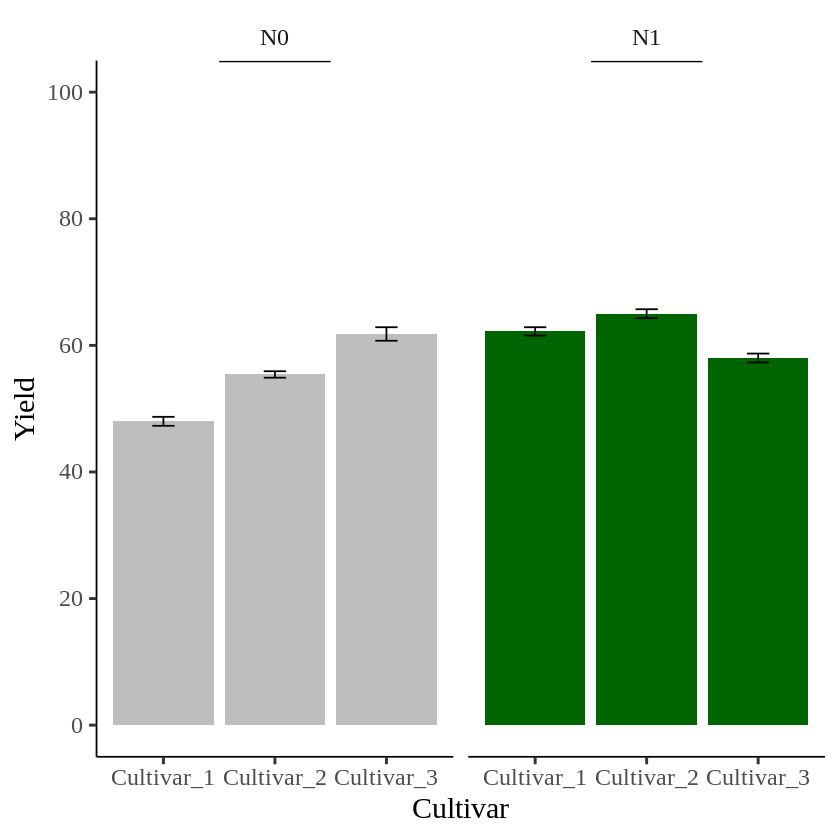

In [32]:
ggplot (data=dataB, aes(x=Genotype, y=Yield_Mean, fill=Nitrogen)) +
  geom_bar(stat="identity",position="dodge") +
  geom_errorbar(aes(ymin= Yield_Mean-Yield_se, ymax= Yield_Mean+Yield_se),
                position=position_dodge(0.9), width=0.2) +
  scale_fill_manual(values= c("Gray","Dark green")) +
  scale_y_continuous(breaks= seq(0, 100, 20), limits= c(0, 100))+
  facet_wrap(~Nitrogen) +
  labs(x="Cultivar", y="Yield") +
  theme_classic(base_size=18, base_family="serif")+
  theme(legend.position='none',
        legend.title=element_blank(),
        legend.key=element_rect(color="white", fill="white"),
        legend.text=element_text(family="serif", face="plain",
                                 size=15, color= "Black"),
        legend.background=element_rect(fill="white"),
        axis.line=element_line(linewidth=0.5, colour="black"),
        strip.background=element_rect(color="white",
                                      linewidth=0.5,linetype="solid"))

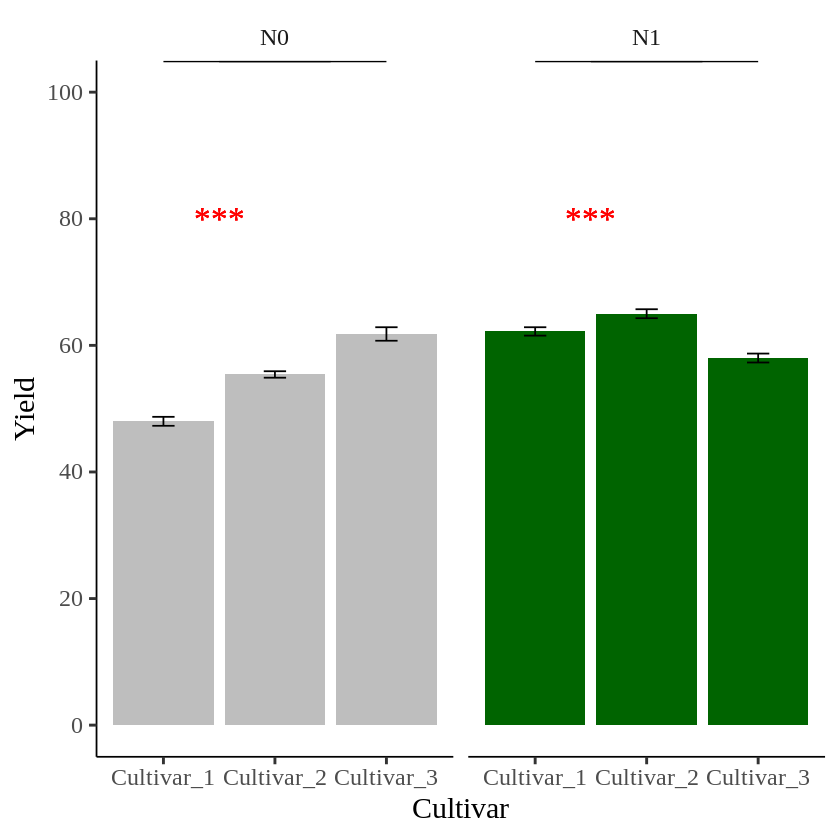

In [40]:
ggplot (data=dataB, aes(x=Genotype, y=Yield_Mean, fill=Nitrogen)) +
  geom_bar(stat="identity",position="dodge") +
  geom_errorbar(aes(ymin= Yield_Mean-Yield_se, ymax= Yield_Mean+Yield_se),
                position=position_dodge(0.9), width=0.2) +
  scale_fill_manual(values= c("Gray","Dark green")) +
  ###
  geom_text(aes(family="serif",fontface=6), x=1.5, y=80, label="***", size=7, col="red") +
  ###
  scale_y_continuous(breaks= seq(0, 100, 20), limits= c(0, 100))+
  facet_wrap(~Nitrogen) +
  annotate("segment", x=1.5, xend=2.5, y=Inf,yend=Inf, color="black", lwd=1)+
  labs(x="Cultivar", y="Yield") +
  theme_classic(base_size=18, base_family="serif")+
  theme(legend.position='none',
        legend.title=element_blank(),
        legend.key=element_rect(color="white", fill="white"),
        legend.text=element_text(family="serif", face="plain",
                                 size=15, color= "Black"),
        legend.background=element_rect(fill="white"),
        axis.line=element_line(linewidth=0.5, colour="black"),
        strip.background=element_rect(color="white",
                                      linewidth=0.5,linetype="solid"))

# to create data table to insert text to specific panel

In [49]:
text1= data.frame(Nitrogen="N0", STAT= "***", Genotype="Cultivar_2", Yield=70)
geom_text(data=text1, aes(family="serif", x=Genotype, y=Yield, label=STAT), size=5, color="red")

Nitrogen,STAT,Genotype,Yield
<chr>,<chr>,<chr>,<dbl>
N0,***,Cultivar_2,70


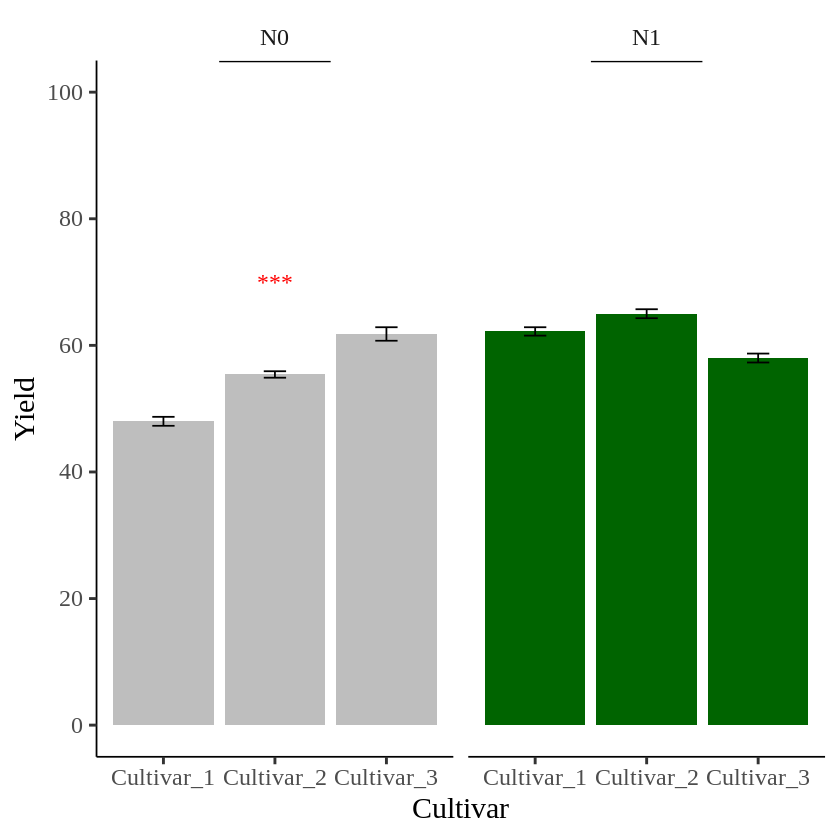

In [36]:
ggplot (data=dataB, aes(x=Genotype, y=Yield_Mean, fill=Nitrogen)) +
  geom_bar(stat="identity",position="dodge") +
  geom_errorbar(aes(ymin= Yield_Mean-Yield_se, ymax= Yield_Mean+Yield_se),
                position=position_dodge(0.9), width=0.2) +
  scale_fill_manual(values= c("Gray","Dark green")) +
  ###
  geom_text(data=text1, aes(family="serif", x=Genotype, y=Yield, label=STAT), size=5, color="red") +
  ###
  scale_y_continuous(breaks= seq(0, 100, 20), limits= c(0, 100))+
  facet_wrap(~Nitrogen) +
  annotate("segment", x=1.5, xend=2.5, y=Inf,yend=Inf, color="black", lwd=1)+
  labs(x="Cultivar", y="Yield") +
  theme_classic(base_size=18, base_family="serif")+
  theme(legend.position='none',
        legend.title=element_blank(),
        legend.key=element_rect(color="white", fill="white"),
        legend.text=element_text(family="serif", face="plain",
                                 size=15, color= "Black"),
        legend.background=element_rect(fill="white"),
        axis.line=element_line(linewidth=0.5, colour="black"),
        strip.background=element_rect(color="white",
                                      linewidth=0.5,linetype="solid"))

In [ ]:
text2= data.frame(Nitrogen="N1", STAT= "**", Genotype="Cultivar_1", Yield=80)
geom_text(data=text2, aes(family="serif", x=Genotype, y=Yield, label=STAT), size=5, color="red")

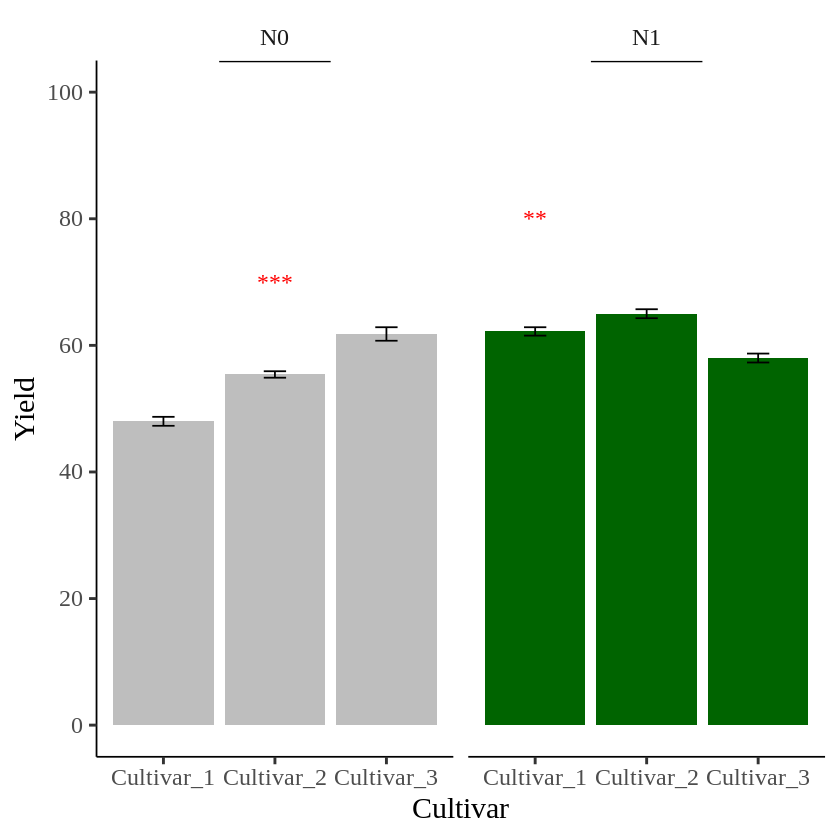

In [39]:
ggplot (data=dataB, aes(x=Genotype, y=Yield_Mean, fill=Nitrogen)) +
  geom_bar(stat="identity",position="dodge") +
  geom_errorbar(aes(ymin= Yield_Mean-Yield_se, ymax= Yield_Mean+Yield_se),
                position=position_dodge(0.9), width=0.2) +
  scale_fill_manual(values= c("Gray","Dark green")) +
  ###
  geom_text(data=text1, aes(family="serif", x=Genotype, y=Yield, label=STAT), size=5, color="red") +
  geom_text(data=text2, aes(family="serif", x=Genotype, y=Yield, label=STAT), size=5, color="red") +
  ###
  scale_y_continuous(breaks= seq(0, 100, 20), limits= c(0, 100))+
  facet_wrap(~Nitrogen) +
  annotate("segment", x=1.5, xend=2.5, y=Inf,yend=Inf, color="black", lwd=1)+
  labs(x="Cultivar", y="Yield") +
  theme_classic(base_size=18, base_family="serif")+
  theme(legend.position='none',
        legend.title=element_blank(),
        legend.key=element_rect(color="white", fill="white"),
        legend.text=element_text(family="serif", face="plain",
                                 size=15, color= "Black"),
        legend.background=element_rect(fill="white"),
        axis.line=element_line(linewidth=0.5, colour="black"),
        strip.background=element_rect(color="white",
                                      linewidth=0.5,linetype="solid"))